Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
def generate_profile(df):
    '''generate pandas profile'''
 
    profile = ProfileReport(df)   
    profile.to_widgets()

In [4]:
eda = pd.read_csv('D:\cap\capstone2\data\interim\eda.csv', low_memory=False)

In [5]:
eda.head()

,Unnamed: 0,pilot_key,ev_id,ac_key,find_key,ev_date,far_part,second_pilot,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type,ev_country,mid_air,on_ground_collision,light_cond,ev_highest_injury,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FE,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_RMPT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTR_AME,INSTR_ASE,INSTR_GLI,INSTR_GYRO,INSTR_HELI,INSTR_IAIR,INSTR_IHEL,INSTR_PLFT,INSTR_SPRT,INSTR_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INST,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INST,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INST,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INST,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INST,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INST,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL
0,0,20001208X0880311,20001208X08803,20001208X088031,20001208X0880311,9/14/1997 0:00:00,91,N,PILOT,46.0,M,CL3,UNK,10/3/1995 0:00:00,2,Personnel issues,4,Action/decision,15,Info processing/decision,20,Decision making/judgment,44,Pilot,C,ACC,USA,N,N,DAYL,FATL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,20001208X0880311,20001208X08803,20001208X088031,20001208X0880312,9/14/1997 0:00:00,91,N,PILOT,46.0,M,CL3,UNK,10/3/1995 0:00:00,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,84,Decision related to condition,C,ACC,USA,N,N,DAYL,FATL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,20001208X0880311,20001208X08803,20001208X088031,20001208X0880313,9/14/1997 0:00:00,91,N,PILOT,46.0,M,CL3,UNK,10/3/1995 0:00:00,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,82,Effect on operation,C,ACC,USA,N,N,DAYL,FATL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,20001208X0880311,20001208X08803,20001208X088031,20001208X0880314,9/14/1997 0:00:00,91,N,PILOT,46.0,M,CL3,UNK,10/3/1995 0:00:00,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,12,Altitude,20,Not attained/maintained,C,ACC,USA,N,N,DAYL,F

In [6]:
eda['crew_age'].fillna(0, inplace=True)
eda['crew_age'] = eda['crew_age'].astype(int)

In [7]:
#drop pilot duplicate to analyze pilot data
pilot = eda.drop_duplicates(subset=['pilot_key'])
pilot.head()

,Unnamed: 0,pilot_key,ev_id,ac_key,find_key,ev_date,far_part,second_pilot,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type,ev_country,mid_air,on_ground_collision,light_cond,ev_highest_injury,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FE,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_RMPT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTR_AME,INSTR_ASE,INSTR_GLI,INSTR_GYRO,INSTR_HELI,INSTR_IAIR,INSTR_IHEL,INSTR_PLFT,INSTR_SPRT,INSTR_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INST,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INST,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INST,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INST,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INST,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INST,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL
0,0,20001208X0880311,20001208X08803,20001208X088031,20001208X0880311,9/14/1997 0:00:00,91,N,PILOT,46,M,CL3,UNK,10/3/1995 0:00:00,2,Personnel issues,4,Action/decision,15,Info processing/decision,20,Decision making/judgment,44,Pilot,C,ACC,USA,N,N,DAYL,FATL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,20080109X0003611,20080109X00036,20080109X000361,20080109X0003611,1/1/2008 0:00:00,91,N,PILOT,54,F,CL3,VALID,9/1/2006 0:00:00,3,Environmental issues,3,Conditions/weather/phenomena,40,Wind,40,Crosswind,99,Not specified,F,ACC,USA,N,N,DAYL,NONE,VMC,NONE,PERS,Landing,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,42.0,42.0,0.0,0.0,2.0,4.0,16.0,870.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,16.0,260.0,260.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,16.0,870.0,1000.0,0.0,0.0,0.0,0.0,0.0,85.0,85.0
7,7,20080116X0006311,20080116X00063,NaN,20080116X0006311,1/5/2008 0:00:00,NaN,NaN,PILOT,50,M,CL1,VALID,8/7/2007 0:00:00,1,Aircraft,3,Aircraft structures,52,Doors,30,Cargo/baggage doors,13,Incorrect service/maintenance,C,ACC,USA,N,N,DAYL,FATL,VMC,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,3.0,74.0,179.0,0.0,9437.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,1108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6000.0,0.0,0.0,0.0,0.0,0.0,0.0,2328.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0
12,12,20080117X0006711,20080117X00067,NaN,20080117X0006711,1/14/2008 0:00:00,NaN,NaN,PILOT,38,M,CL1,VALID,1/1/2008 0:00:00,2,Personnel issues,2,Psychological,20,Perception/orientation/illusio,25,Spatial disorientation,44,Pilot,C,ACC,USA,N,N,NDRK,FATL,VMC,NaN,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1

count    14032.000000
mean        53.135832
std         15.767688
min          0.000000
25%         43.000000
50%         55.000000
75%         65.000000
max        100.000000
Name: crew_age, dtype: float64

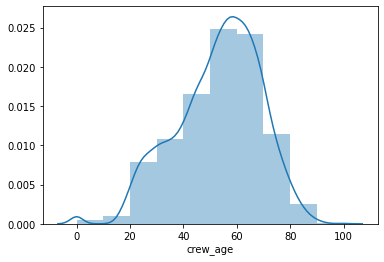

In [8]:
sns.distplot(pilot['crew_age'], bins=10)
pilot['crew_age'].describe()

In [9]:
pilot0 = pilot[pilot['crew_age'] == 0]
pilot0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 64 to 47389
Columns: 146 entries, Unnamed: 0 to SIMU-TOTL
dtypes: float64(111), int32(1), int64(6), object(28)
memory usage: 85.8+ KB


There are 75 pilots with no age information. Age will be derived from experiece level by total flight time as compared to other pilots in the dataset.

<AxesSubplot:xlabel='ALL-TOTL'>

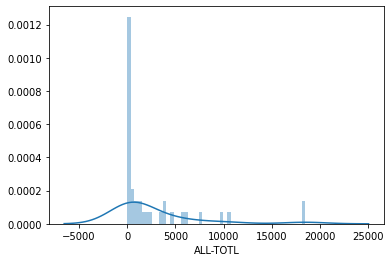

In [10]:
sns.distplot(pilot0['ALL-TOTL'], bins=50)

A number of pilot with no age information are also missing total-time information and therefore their age will not be derived by algorithim. These pilots will be assigned the median age for the dataset.

In [11]:
# fill in pilot age with average pilot age based on total flight hours

#define pilot experience categories in bin of 250 hours
pilot0_max_hour = pilot0['ALL-TOTL'].max()
age_med_by_time = {} #holds median age for each time bracket
for hour_bin in range(1, int(pilot0_max_hour), 250):
    time_range = (hour_bin, hour_bin + 250)
    pop_age = eda[(eda['ALL-TOTL'] >= int(hour_bin)) & (eda['ALL-TOTL'] < (int(hour_bin) + 250))]
    age_med_by_time[time_range] = int(pop_age['crew_age'].median())
    
totl_idx = pilot0.columns.get_loc('ALL-TOTL')
age_idx = pilot0.columns.get_loc('crew_age')

for i in range(0, len(pilot0.index)):
    for key in age_med_by_time:
        if (pilot0.iloc[i,totl_idx] >= key[0]) & (pilot0.iloc[i,totl_idx] < key[1]):
            pilot0.iloc[i,age_idx] = age_med_by_time[key]
            

D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [12]:
#aged_pilots contains pilots with derived ages based on experience
aged_pilots = pilot0[pilot0['crew_age'] != 0]
aged_pilots.reset_index(inplace=True)
print(aged_pilots.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 147 entries, index to SIMU-TOTL
dtypes: float64(111), int32(1), int64(7), object(28)
memory usage: 43.6+ KB
None


In [13]:
zero_count = eda[eda['crew_age'] == 0].count()
zero_count

Unnamed: 0    3593
pilot_key      205
ev_id         3593
ac_key         415
find_key      3593
              ... 
SIMU-L24H      100
SIMU-L30D      100
SIMU-L90D      100
SIMU-PIC       100
SIMU-TOTL      100
Length: 146, dtype: int64

In [14]:
#backfill ages to eda df.
for i in range (0, len(aged_pilots.index)):
    for r in range (0, len(eda.index)):
        if aged_pilots.iloc[i,2] == eda.iloc[r,1]:
            eda.iloc[r,9] = aged_pilots.iloc[i,10]

In [15]:
eda['crew_age'].describe()

count    47643.000000
mean        49.544592
std         20.308484
min          0.000000
25%         39.000000
50%         54.000000
75%         64.000000
max        100.000000
Name: crew_age, dtype: float64

In [16]:
zero_count = eda[eda['crew_age'] == 0].count()
zero_count

Unnamed: 0    3495
pilot_key      107
ev_id         3495
ac_key         342
find_key      3495
              ... 
SIMU-L24H        2
SIMU-L30D        2
SIMU-L90D        2
SIMU-PIC         2
SIMU-TOTL        2
Length: 146, dtype: int64

In [17]:
#mean age of pilot in overall dataset
age_avg_df = eda[eda['crew_age']!=0]
avg_age = int(age_avg_df['crew_age'].mean())
print(avg_age)

53


In [18]:
#backfill remaining 0 ages with df average.
for i in range (0, len(eda.index)):
    if eda.iloc[i,9] == 0:
        eda.iloc[i,9] = int(avg_age)

In [19]:
# eda table is now adjusted with derived ages
eda['crew_age'].describe()

count    47643.000000
mean        53.432571
std         14.768896
min         14.000000
25%         44.000000
50%         54.000000
75%         64.000000
max        100.000000
Name: crew_age, dtype: float64

In [20]:
#generate_profile(eda)

In [21]:
to_drop = ['ac_key', 'second_pilot', 'ev_country', 'flt_plan_filed', 'phase_flt_spec', 'CERT_RMPT', 
           'OTHR_SUAS', 'SIMU-INST', 'SIMU-IRCV', 'SIMU-L24H', 'SIMU-L30D', 'SIMU-L90D', 'SIMU-PIC',
           'ROTO-INST', 'ROTO-IRCV', 'ROTO-L24H', 'ROTO-L30D', 'ROTO-L90D', 'ROTO-PIC', 'ROTO-TOTL',
           'OTHR_AIRS', 'OTHR_BALL', 'OTHR_GLI', 'OTHR_GYRO', 'OTHR_HELI', 'OTHR_PLFT', 'OTHR_SUAS', 'OTHR_NONE',
           'LTA-INST', 'LTA-IRCV', 'LTA-L24H', 'LTA-L30D', 'LTA-L90D', 'LTA-PIC', 'LTA-TOTL', 'Unnamed: 0', 
           'INSTR_PLFT', 'CERT_FE', 'INSTR_GYRO', 'INSTR_HELI', 'INSTR_IHEL','INSTRUM_HELI', 'INSTR_PLFT',
           'INC-NO','REL-NO', 'INSTRUM_PLFT']
eda.drop(columns=to_drop, inplace=True)
eda.head()

,pilot_key,ev_id,find_key,ev_date,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type,mid_air,on_ground_collision,light_cond,ev_highest_injury,wx_cond_basic,type_fly,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTR_AME,INSTR_ASE,INSTR_GLI,INSTR_IAIR,INSTR_SPRT,INSTR_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INST,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INST,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,MAKE-INST,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INST,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INST,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INST,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
0,20001208X0880311,20001208X08803,20001208X0880311,9/14/1997 0:00:00,91,PILOT,46,M,CL3,UNK,10/3/1995 0:00:00,2,Personnel issues,4,Action/decision,15,Info processing/decision,20,Decision making/judgment,44,Pilot,C,ACC,N,N,DAYL,FATL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
1,20001208X0880311,20001208X08803,20001208X0880312,9/14/1997 0:00:00,91,PILOT,46,M,CL3,UNK,10/3/1995 0:00:00,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,84,Decision related to condition,C,ACC,N,N,DAYL,FATL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
2,20001208X0880311,20001208X08803,20001208X0880313,9/14/1997 0:00:00,91,PILOT,46,M,CL3,UNK,10/3/1995 0:00:00,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,82,Effect on operation,C,ACC,N,N,DAYL,FATL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
3,20001208X0880311,20001208X08803,20001208X0880314,9/14/1997 0:00:00,91,PILOT,46,M,CL3,UNK,10/3/1995 0:00:00,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,12,Altitude,20,Not attained/maintained,C,ACC,N,N,DAYL,FATL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
4,20001208X0880311,20001208X08803,20001208X0880315,9/14/1997 0:00:00,91,PILOT,46,M,CL3,UNK,10/3/1995 0:00:00,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,0,(general),20,Not attained/maintained,C,ACC,N,N,DAYL,FATL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0


In [22]:
eda.rename(columns={'INSTR_AME':'INSTRUCT_AME', 'INSTR_ASE':'INSTRUCT_ASE', 'INSTR_GLI':'INSTRUCT_GLI', 
                    'INSTR_IAIR':'INSTRUCT_IAIR', 'INSTR_SPRT':'INSTRUCT_SPRT', 'INSTR_NONE':'INSTRUCT_NONE',
                    'ALL-INST': 'ALL-INSTRUM', 'GLDR-INST':'GLDR-INSTRUCT', 'MAKE-INST':'MAKE-INSTRUCT',
                    'MENG-INST':'MENG-INSTRUCT', 'NGHT-INST':'NGHT-INSTRUCT', 'SENG-INST':'SENG-INSTRUCT'}, inplace=True)

Task: look at description of findings and filter out those not directly pertaining with pilots.

In [23]:
eda['cat_descript'].value_counts()

Personnel issues         20177
Aircraft                 16818
Environmental issues      9908
Organizational issues      544
Name: cat_descript, dtype: int64

In [24]:
org_records = eda.loc[eda['cat_descript'] == 'Organizational issues' , ['category_no', 'cat_descript', 'subcategory_no', 'sub_descript', 'section_no', 'sec_descript', 'subsection_no', 'subsec_descript', 'modifier_no', 'mod_descript', 'Cause_Factor', 'ev_type']]
org_records

,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type
9,4,Organizational issues,3,Support/oversight/monitoring,10,Training,30,Emergency proc training,66,Manufacturer,F,ACC
10,4,Organizational issues,2,Management,10,Policy/procedure,10,Availability of policy/proc,66,Manufacturer,F,ACC
19,4,Organizational issues,2,Management,10,Policy/procedure,15,Adequacy of policy/proc,99,Not specified,,ACC
26,4,Organizational issues,2,Management,10,Policy/procedure,15,Adequacy of policy/proc,99,Not specified,,ACC
41,4,Organizational issues,3,Support/oversight/monitoring,20,Oversight,10,Oversight of personnel,70,FAA/Regulator,,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...
45557,4,Organizational issues,3,Support/oversight/monitoring,20,Oversight,15,Oversight of operation,70,FAA/Regulator,F,ACC
45558,4,Organizational issues,3,Support/oversight/monitoring,40,Enforcement,15,Operational procedures,70,FAA/Regulator,F,ACC
45559,4,Organizational issues,3,Support/oversight/monitoring,50,Safety programs,15,Adequacy of safety program,69,Operator,F,ACC
45560,4,Organizational issues,3,Support/oversight/monitoring,50,Safety programs,20,Adherence to safety program,69,Operator,F,ACC


In [25]:
org_records['mod_descript'].value_counts()

Operator                          170
Manufacturer                      136
FAA/Regulator                      99
ATC                                40
Other institution/organization     22
Not specified                      22
Maintenance provider               17
Airport                            14
Other government                    9
Meteorological service              7
Training organization               3
Equipment supplier                  3
Emergency services                  2
Name: mod_descript, dtype: int64

In [26]:
org_records['subsec_descript'].value_counts()

Adequacy of policy/proc           95
(general)                         75
Oversight of operation            49
Equipment design                  30
Oversight of personnel            23
Oversight of maintenance          22
Availability of policy/proc       20
Equipment manufacture             19
Equip certification/testing       18
Adequacy of safety program        14
Policy/procedure development      14
Initial training                  13
Maintenance records               13
Document/info production          11
Upgrade training                  10
Design of document/info           10
Between groups/organizations       9
Standard operating practices       9
Oversight of reg compliance        8
Safety                             8
Availability of safety program     5
Document/info verification         5
Emergency proc training            5
Equipment monitoring               4
Regulatory requirements            4
Adherence to safety program        4
Pressures/demands                  3
P

For the most part,  organizational issues are not directly related specifically to pilot action and will be removed from the dataset. 

In [27]:
eda = eda[eda['cat_descript'] != 'Organizational issues']

In [28]:
env_records = eda.loc[eda['cat_descript'] == 'Environmental issues' , ['category_no', 'cat_descript', 'subcategory_no', 'sub_descript', 'section_no', 'sec_descript', 'subsection_no', 'subsec_descript', 'modifier_no', 'mod_descript', 'Cause_Factor', 'ev_type']]
env_records

,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type
1,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,84,Decision related to condition,C,ACC
2,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,82,Effect on operation,C,ACC
5,3,Environmental issues,3,Conditions/weather/phenomena,40,Wind,40,Crosswind,99,Not specified,F,ACC
13,3,Environmental issues,4,Task environment,20,Pressures/demands,30,Equipment/operational,83,Effect on personnel,F,ACC
14,3,Environmental issues,3,Conditions/weather/phenomena,60,Light condition,20,Dark,83,Effect on personnel,F,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...
47626,3,Environmental issues,3,Conditions/weather/phenomena,10,Temp/humidity/pressure,40,Thermal lifting,81,Effect on equipment,C,ACC
47628,3,Environmental issues,2,Physical environment,20,Object/animal/substance,20,Tree(s),82,Effect on operation,C,ACC
47640,3,Environmental issues,2,Physical environment,30,Runway/land/takeoff/taxi surface,20,Soft surface,82,Effect on operation,C,ACC
47641,3,Environmental issues,2,Physical environment,30,Runway/land/takeoff/taxi surface,0,(general),82,Effect on operation,C,ACC


In [29]:
env_records.sub_descript.unique()

array(['Conditions/weather/phenomena', 'Task environment',
       'Physical environment', 'Operating environment'], dtype=object)

In [30]:
env_records.mod_descript.unique()

array(['Decision related to condition', 'Effect on operation',
       'Not specified', 'Effect on personnel', 'Awareness of condition',
       'Contributed to outcome', 'Effect on equipment',
       'Response/compensation', 'Ability to respond/compensate',
       'Availability of related info', 'Use of related info',
       'Compliance w/ procedure', 'Accuracy of related info',
       'Timing of related info'], dtype=object)

In [31]:
#condense environmental mod_descripts

cat_idx = eda.columns.get_loc('cat_descript')
mod_idx = eda.columns.get_loc('mod_descript')

for i in range (0, len(eda)):
    if eda.iloc[i,cat_idx] == 'Environmental issues':
        if eda.iloc[i, mod_idx] == 'Ability to respond/compensate':
            eda.iloc[i, mod_idx] = 'Response/compensation'
        elif eda.iloc[i, mod_idx] == 'Timing of related info':
            eda.iloc[i, mod_idx] = 'Availability of related info'

All environmetal issues appear to be applicable to analysis and these records will be retained.

Analize caracteritics of findings with category aircraft.

In [33]:
aircraft = eda.loc[eda['cat_descript'] == 'Aircraft' , ['category_no', 'cat_descript', 'subcategory_no', 'sub_descript', 'section_no', 'sec_descript', 'subsection_no', 'subsec_descript', 'modifier_no', 'mod_descript', 'Cause_Factor', 'ev_type']]

In [34]:
aircraft.sub_descript.unique()

array(['Aircraft oper/perf/capability', 'Aircraft structures',
       'Aircraft power plant', 'Aircraft systems',
       'Aircraft handling/service', 'Fluids/misc hardware',
       'Aircraft propeller/rotor'], dtype=object)

In [35]:
aircraft.sec_descript.unique()

array(['Performance/control parameters', 'Doors',
       'Engine (turbine/turboprop)', 'Aircraft capability', '(general)',
       'Vacuum system', 'Fuel system', 'Engine (reciprocating)',
       'Power plant', 'Flight control system', 'Maintenance/inspections',
       'Landing gear system', 'Engine fuel and control',
       'Ignition system', 'Electrical power system', 'Fuselage',
       'Auto flight system', 'Navigation system', 'Misc hardware',
       'Tail rotor drive system', 'Main rotor system',
       'Hydraulic power system', 'Rotorcraft flight control',
       'Propeller system', 'Tail rotor', 'Air conditioning system',
       'Main rotor drive', 'Fluids', 'Empennage structure',
       'Engine controls', 'Eng oil sys (airframe furnish)',
       'Engine exhaust', 'Oxygen system', 'Wing structure',
       'Equipment/furnishings', 'Turbocharging (recip only)', 'Loading',
       'Towing and taxiing', 'Balloon/dirigible structures',
       'Parking/securing', 'Indicating/recording s

In [36]:
aircraft.subsec_descript.unique()

array(['Altitude', '(general)', 'Directional control',
       'Cargo/baggage doors', 'Airspeed', 'Pitch control',
       'Turbine section', 'Maximum weight', 'Lateral/bank control',
       'Vacuum indicating system', 'Recip eng cyl section',
       'Landing flare', 'Stabilizer control system', 'Main landing gear',
       'Fuel pump', 'Fuel pumps', 'Instrument flight capability',
       'Gear position and warning', 'Electrical pwr sys wiring',
       'DC power distribution system', 'Seat/cargo attach fitting',
       'Crosswind correction', 'Landing gear brakes system', 'Air intake',
       'Heading/course', 'Descent/approach/glide path',
       'Autopilot trim servo', 'Stall warning system', 'Hoses and tubes',
       'Fuel transfer valve', 'Prop/rotor parameters',
       'Tail rotor drive shaft', 'Main rotor blade system',
       'Rudder control system', 'Hydraulic, indicating system',
       'Hydraulic, auxiliary system', 'Global positioning sys (GPS)',
       'Recip engine power sect

In [37]:
air_mod = aircraft.mod_descript.unique().tolist()
air_mod

['Not attained/maintained',
 'Incorrect service/maintenance',
 'Fatigue/wear/corrosion',
 'Capability exceeded',
 'Failure',
 'Malfunction',
 'Not specified',
 'Damaged/degraded',
 'Incorrect use/operation',
 'Attain/maintain not possible',
 'Inadequate inspection',
 'Not serviced/maintained',
 'Design',
 'Related maintenance info',
 'skid sectio',
 'Unintentional use/operation',
 'Fluid level',
 'Inoperative',
 'Fluid management',
 'Not used/operated',
 'Fluid condition',
 'Related operating info',
 'Unneccessary use/operation',
 'Not inspected',
 'Fluid type',
 'Related records',
 'Simulated malf/failure',
 'Flight compartment window',
 'down/moorin',
 '(general',
 'generator drive sy',
 'straine',
 'alternato',
 'Door window',
 'Not installed/available',
 'ice, deic',
 'Unnecessary use/operation']

In [38]:
#Keep only those records related to pilot action

rec_keep = ['Not attained/maintained', 'Capability exceeded', 'Damaged/degraded', 'Incorrect use/operation', 'Attain/maintain not possible',
 'Unintentional use/operation', 'Fluid level', 'Inoperative', 'Fluid management', 'Not used/operated',  
 'Unneccessary use/operation', 'Simulated malf/failure', 'Unnecessary use/operation']

eda = eda[(eda['cat_descript'] == 'Aircraft') & (eda['mod_descript'].isin(rec_keep))]

In [39]:
aircraft = eda[eda['cat_descript'] == 'Aircraft']

In [40]:
aircraft.mod_descript.value_counts()

Not attained/maintained         7295
Incorrect use/operation         1470
Capability exceeded              932
Fluid level                      613
Attain/maintain not possible     524
Damaged/degraded                 432
Fluid management                 398
Not used/operated                263
Unintentional use/operation      136
Inoperative                      117
Unneccessary use/operation         9
Simulated malf/failure             5
Unnecessary use/operation          2
Name: mod_descript, dtype: int64

In [41]:
#condense mod_descriptions into more general categories

cat_idx = eda.columns.get_loc('cat_descript')
mod_idx = eda.columns.get_loc('mod_descript')

for i in range (0, len(eda)):
    if eda.iloc[i,cat_idx] == 'Aircraft':
        if eda.iloc[i, mod_idx] == 'Unnecessary use/operation':
            eda.iloc[i, mod_idx] = 'Improper use/operation'
        elif eda.iloc[i, mod_idx] == 'Unneccessary use/operation':
            eda.iloc[i, mod_idx] = 'Improper use/operation'
        elif eda.iloc[i, mod_idx] == 'Incorrect use/operation':
            eda.iloc[i, mod_idx] = 'Improper use/operation'
        elif eda.iloc[i, mod_idx] == 'Fluid level':
            eda.iloc[i, mod_idx] = 'Fluid management'
        elif eda.iloc[i, mod_idx] == 'Damaged/degraded':
            eda.iloc[i, mod_idx] = 'Damaged/degraded/inoperative'
        elif eda.iloc[i, mod_idx] == 'Inoperative':
            eda.iloc[i, mod_idx] = 'Damaged/degraded/inoperative'
            
            

In [42]:
aircraft = eda[eda['cat_descript'] == 'Aircraft']
aircraft.mod_descript.value_counts()

Not attained/maintained         7295
Improper use/operation          1481
Fluid management                1011
Capability exceeded              932
Damaged/degraded/inoperative     549
Attain/maintain not possible     524
Not used/operated                263
Unintentional use/operation      136
Simulated malf/failure             5
Name: mod_descript, dtype: int64

In [47]:
personnel_records = eda.loc[eda['cat_descript'] == 'Personnel issues' , ['category_no', 'cat_descript', 'subcategory_no', 'sub_descript', 'section_no', 'sec_descript', 'subsection_no', 'subsec_descript', 'modifier_no', 'mod_descript', 'Cause_Factor', 'ev_type']]
personnel_records.sample(10)

ValueError: a must be greater than 0 unless no samples are taken